In [1]:
from PIL import Image

In [2]:
Image = Image.open(r"C:\Users\rames\Desktop\titanic.jpg")

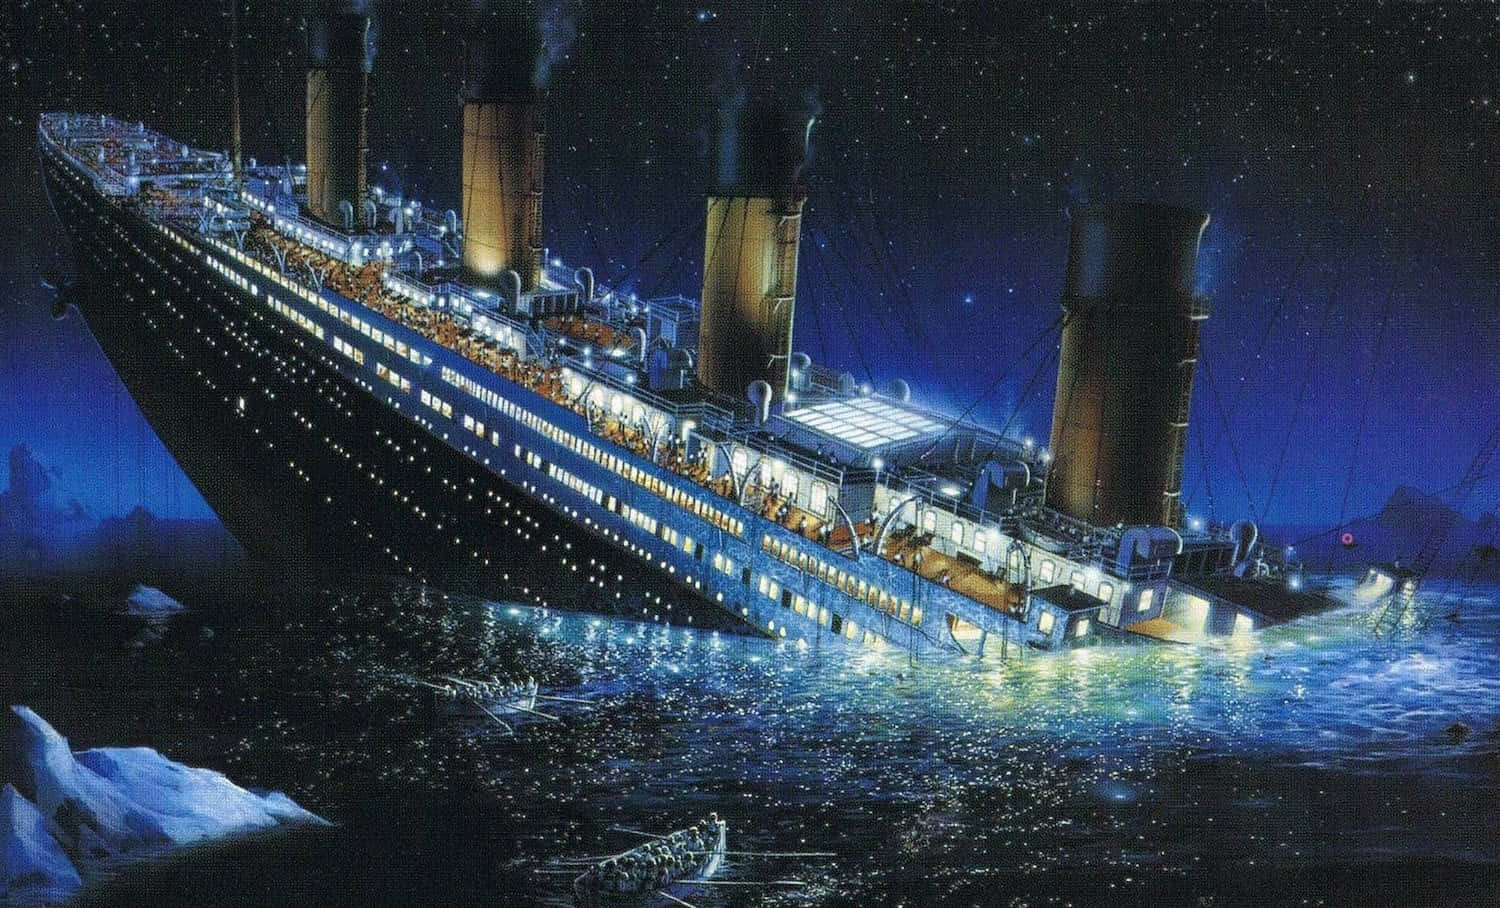

In [3]:
Image

In [4]:
import numpy as np
print(np.__version__)

1.26.4


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r"C:\Users\rames\Downloads\archive (2)\Titanic-Dataset.csv")

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df.shape

(891, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.drop(columns="PassengerId",inplace=True)

## Data Cleaning

In [11]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Outliers Treatment

In [12]:
df['Age'].fillna(df['Age'].mean(),inplace = True)

In [13]:
df['Age ' ] = df['Age'].fillna(df['Age'].median())

In [14]:
df['Cabin'].mode()[0]

'B96 B98'

In [15]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [16]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

In [17]:
df['Embarked'].mode()[0]

'S'

In [18]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [19]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
Age         0
dtype: int64

### Diplicates

In [20]:
df.duplicated().sum()

0


### Noicy Data

In [21]:
for i in df.columns:
    print(df[i].unique())

[0 1]
[3 1 2]
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Ne

## Outliers

In [22]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Age '],
      dtype='object')

### Stastical Analysis

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000


## Data Visulization

In [24]:
import plotly.express as px

<Axes: xlabel='Age', ylabel='Count'>

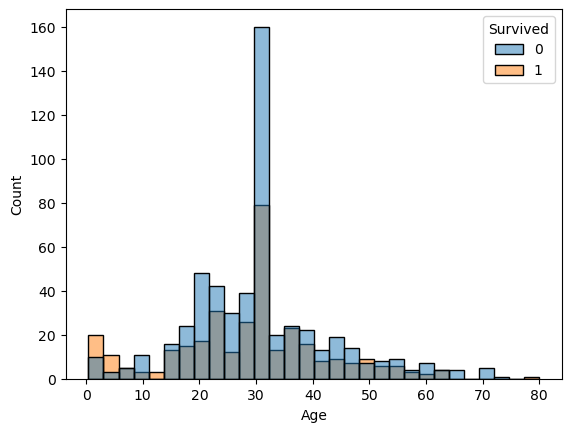

In [25]:
sns.histplot(data = df,x = "Age",hue = 'Survived')

* The graph shows the age distribution of survivors and non-survivors. 
* It appears that younger individuals were more likely to survive, 
* with a peak in survivorship around the age of 20. Conversely, 
* older individuals were more likely to perish, with a peak in mortality around the age of 30. 
* These findings suggest that age was a significant factor in survival during the event depicted in the data.

<Axes: xlabel='Fare', ylabel='Count'>

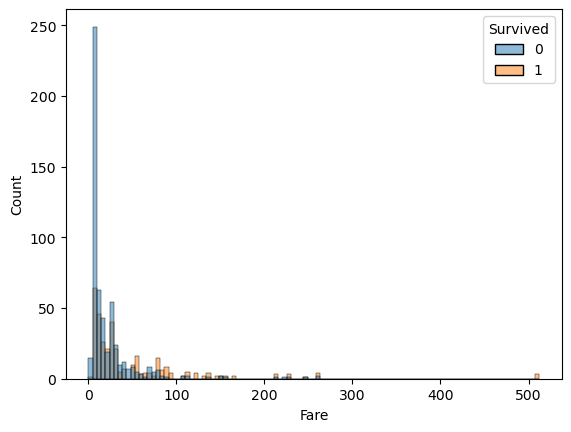

In [26]:
sns.histplot(data = df,x = "Fare",hue = 'Survived')

*  Passengers who paid lower fares had a lower survival rate, while those who paid higher fares had a better chance of survival.
*  The fare distribution is heavily right-skewedwith most passengers paying under $100.

<Axes: xlabel='Pclass', ylabel='count'>

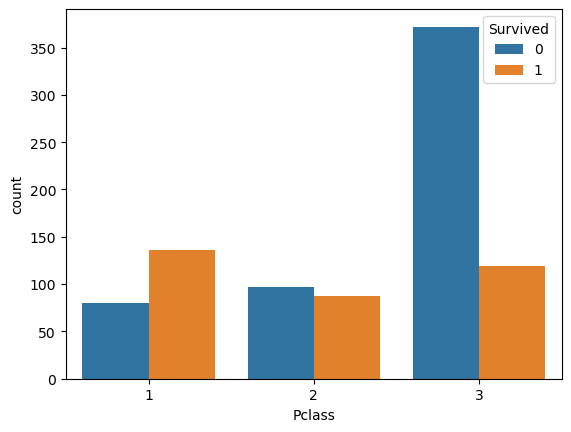

In [27]:
sns.countplot(data = df, x = 'Pclass',hue = 'Survived')

* Passengers in 1st and 2nd class had higher survival rates, while 3rd class passengers had a significantly
* lower survival ratewith most of them not surviving.

<Axes: xlabel='Sex', ylabel='count'>

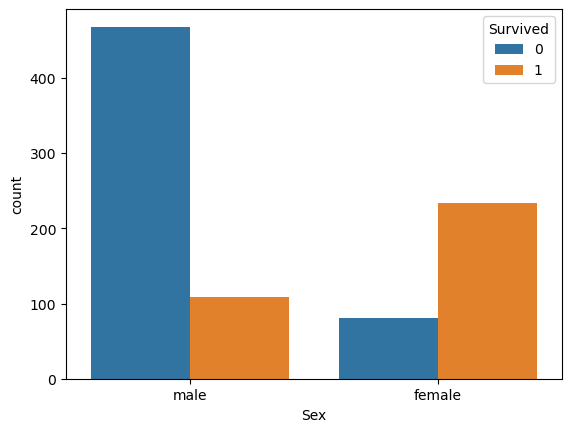

In [28]:
sns.countplot(data = df, x = 'Sex',hue = 'Survived')

* Females had a much higher survival rate than males, with most males not surviving.

<Axes: xlabel='SibSp', ylabel='count'>

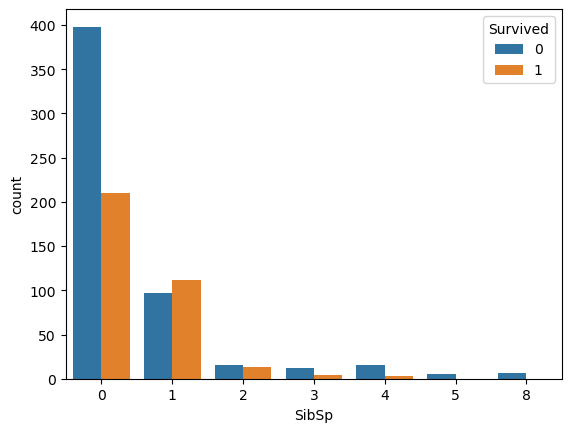

In [29]:
sns.countplot(data = df, x = 'SibSp',hue = 'Survived')

*  Passengers with more siblings or spouses (SibSp) were less likely to survive
*  Most survivors traveled alone (SibSp=0), while a significant number of non-survivors had at least one sibling or spouse

<Axes: xlabel='Parch', ylabel='count'>

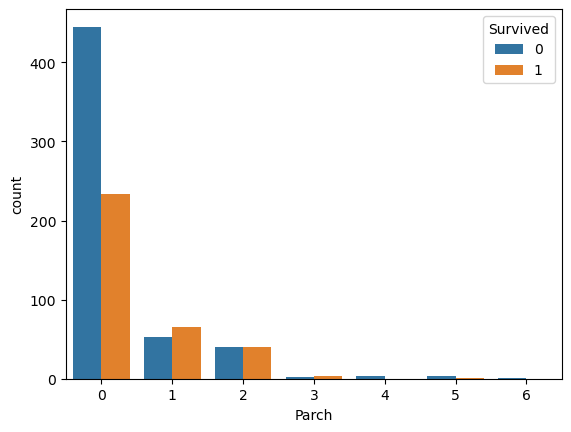

In [30]:
sns.countplot(data = df, x = 'Parch',hue = 'Survived')

*  Passengers with more parents or children (Parch) were less likely to survive
*  Most survivors traveled alone (Parch=0), while a significant number of non-survivors had at least one parent or child.

<Axes: xlabel='Embarked', ylabel='count'>

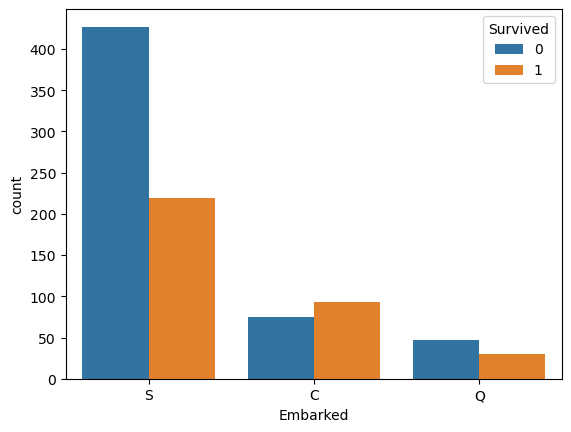

In [31]:
sns.countplot(data = df, x = 'Embarked',hue = 'Survived')

* Passengers who embarked at Southampton (S) were more likely to survive than those from Cherbourg (C) or Queenstown (Q)
* Most survivors embarked at Southampton, while a significant number of non-survivors embarked at Cherbourg

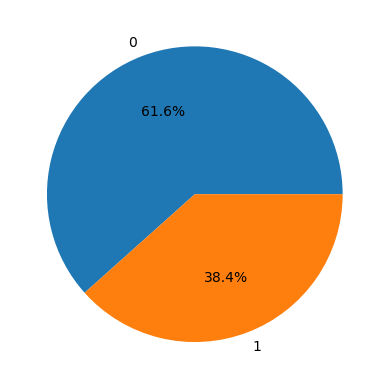

In [32]:
plt.pie(df['Survived'].value_counts(),labels = df['Survived'].unique(),autopct = '%1.1f%%')
plt.show()

* Gender Distribution: The sample dataset is predominantly male (61.6%), with females representing 38.4%
    
* Male Majority: Males outnumber females significantly in the dataset
    


In [33]:
df.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare,Age
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.069809
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.331339
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,1.000000
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.232625
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.179191
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.091566
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,1.000000


<Axes: >

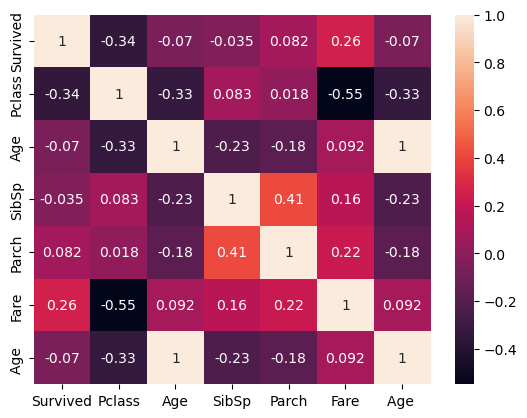

In [34]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

* Strong Negative Correlation between Pclass and Survival: Passengers in higher classes (Pclass) were more likely to survive
* Moderate Positive Correlation between Fare and Survival: Passengers who paid higher fares (Fare) were more likely to survive

C:\Users\rames\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


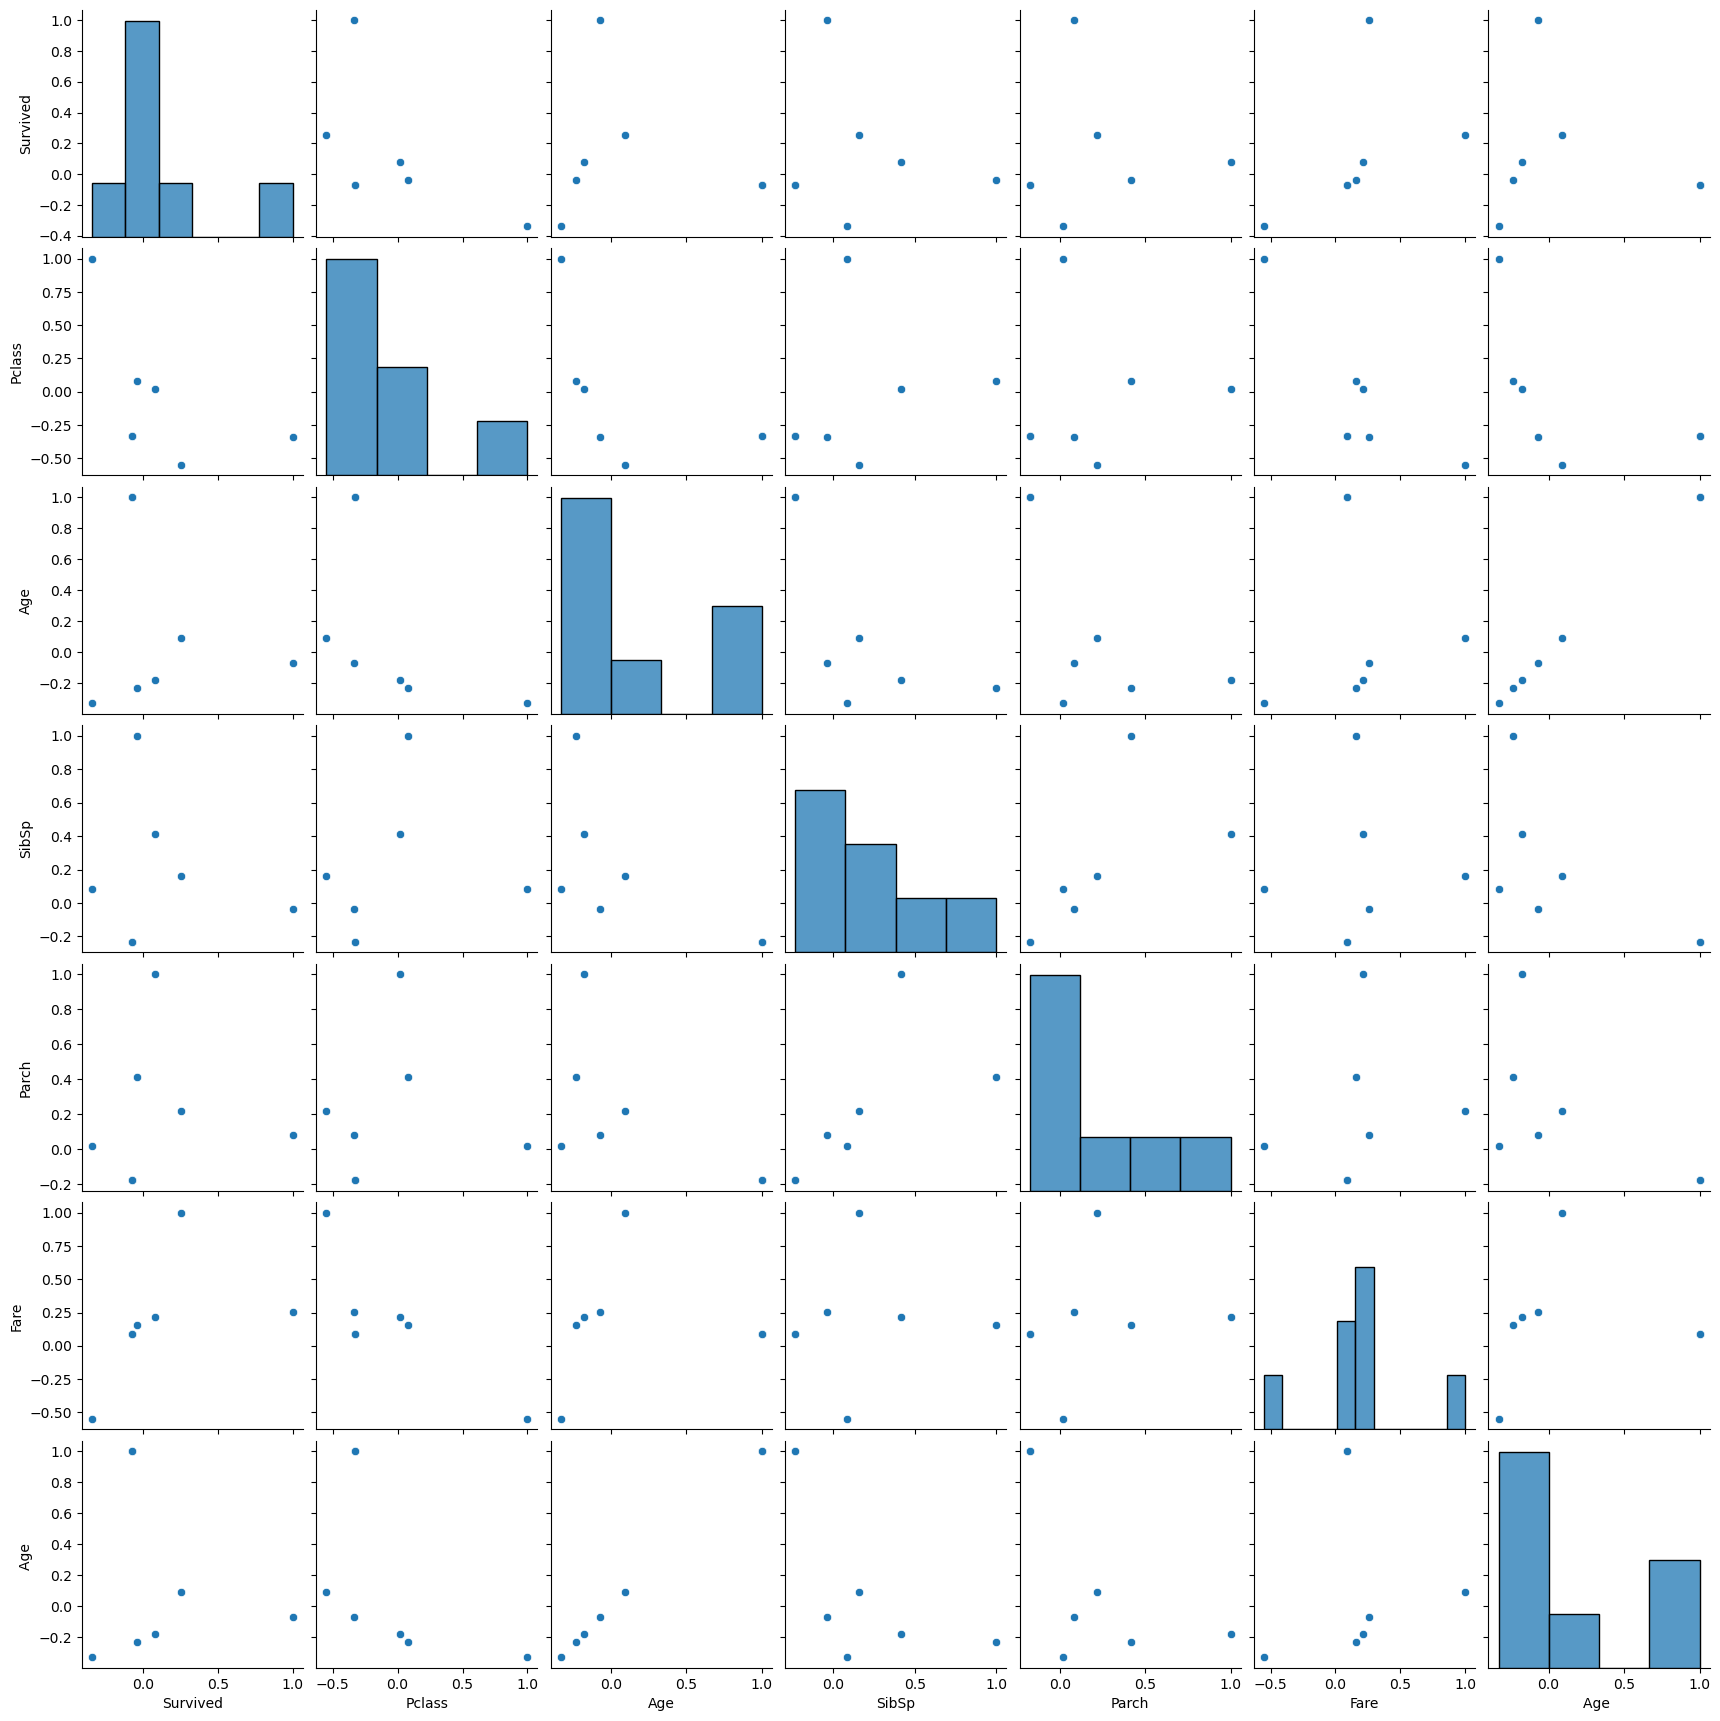

In [35]:
sns.pairplot(df.corr(numeric_only=True))

* Age and Survival: Theres a strong negative correlation between age and survival, suggesting younger passengers were more likely to survive

* Fare and Survival: A moderate positive correlation exists between fare and survival, indicating higher-fare passengers had better survival chances

In [36]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Age '],
      dtype='object')

## Seggregate input and optputs

In [37]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = df['Survived']

In [38]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


## Splitting Data into Train and Test 

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [41]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(668, 7) (223, 7)
(668,) (223,)


In [42]:
X_train_cat = X_train.drop(columns=['Age','Fare'])
X_train_cat.head()

,Pclass,Sex,SibSp,Parch,Embarked
298,1,male,0,0,S
884,3,male,0,0,S
247,2,female,0,2,S
478,3,male,0,0,S
305,1,male,1,2,S


In [43]:
X_train_num= X_train[['Age','Fare']]
X_train_num.head()

,Age,Fare
298,29.699118,30.5000
884,25.000000,7.0500
247,24.000000,14.5000
478,22.000000,7.5208
305,0.920000,151.5500


In [44]:
X_test_cat = X_test.drop(columns=['Age','Fare'])

In [45]:
X_test_num= X_test[['Age','Fare']]
X_test_num.shape

(223, 2)

## Data Preparation on Train and Test data 

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scalar = StandardScaler()

In [48]:
X_train_num_transformed = pd.DataFrame(scalar.fit_transform(X_train_num),
                                       columns= scalar.get_feature_names_out(),
                                       index = X_train_num.index)

In [49]:
X_test_num_transformed = pd.DataFrame(scalar.transform(X_test_num),
                                      columns= scalar.get_feature_names_out(),
                                      index = X_test_num.index)

In [50]:
X_test_num_transformed

,Age,Fare
709,0.017145,-0.328391
439,0.117211,-0.420425
840,-0.728929,-0.470362
720,-1.805833,0.015914
39,-1.190459,-0.406042
...,...,...
880,-0.344320,-0.119836
425,0.017145,-0.483452
101,0.017145,-0.470928
199,-0.421242,-0.371943


In [51]:
X_train_num_transformed.shape

(668, 2)

## one hot encoding

In [52]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
ohe = OneHotEncoder(sparse_output=False)

In [54]:
X_train_cat_transformed = pd.DataFrame(ohe.fit_transform(X_train_cat),
                                       columns = ohe.get_feature_names_out(),
                                       index = X_train_cat.index)

In [55]:
X_test_cat_transformed = pd.DataFrame(ohe.transform(X_test_cat),
                                       columns = ohe.get_feature_names_out(),
                                       index = X_test_cat.index)

In [56]:
X_test_cat_transformed

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
709,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
439,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
840,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
720,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
425,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
101,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
199,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Concatenation

In [57]:
X_train_transformed = pd.concat([X_train_num_transformed,X_train_cat_transformed], axis=1)

X_train_transformed.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
298,0.017145,-0.032568,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
884,-0.344320,-0.487331,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
247,-0.421242,-0.342854,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
478,-0.575085,-0.478201,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
305,-2.196596,2.314937,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [58]:
X_test_transformed = pd.concat([X_test_num_transformed,X_test_cat_transformed], axis=1)

X_test_transformed.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
709,0.017145,-0.328391,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
439,0.117211,-0.420425,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
840,-0.728929,-0.470362,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
720,-1.805833,0.015914,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39,-1.190459,-0.406042,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [59]:
print(X_train.shape,X_train_transformed.shape)

(668, 7) (668, 24)


In [60]:
print(X_test.shape,X_test_transformed.shape)

(223, 7) (223, 24)


## Model Building

### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
reg = LogisticRegression()

In [63]:
reg.fit(X_train_transformed,y_train)

LogisticRegression()

In [64]:
y_pred = reg.predict(X_test_transformed)

### Evalution

In [65]:
from sklearn import metrics

In [66]:
X_test_transformed.shape

(223, 24)

In [67]:
y_test.shape

(223,)

In [68]:
y_pred.shape

(223,)

In [69]:
LR = metrics.accuracy_score(y_test,y_pred)
LR

0.7982062780269058

## Decisssion Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dt = DecisionTreeClassifier()

In [72]:
dt.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [73]:
y_pred = dt.predict(X_test_transformed)

## Evalution

In [74]:
DT = metrics.accuracy_score(y_test,y_pred)
DT

0.7040358744394619

## Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf = RandomForestClassifier()

In [77]:
rf.fit(X_train_transformed,y_train)

RandomForestClassifier()

In [78]:
y_pred = rf.predict(X_test_transformed)

## Evalution

In [79]:
RF = metrics.accuracy_score(y_test,y_pred)
RF

0.7937219730941704

## Support Vector Machine

In [80]:
from sklearn.svm import SVC

In [81]:
svm = SVC()

In [82]:
svm.fit(X_train_transformed,y_train)

SVC()

In [83]:
y_pred = svm.predict(X_test_transformed)

## Evalution

In [84]:
SVM = metrics.accuracy_score(y_test,y_pred)
SVM

0.8161434977578476

## Bernoulli navies Baisd

In [85]:
from sklearn.naive_bayes import BernoulliNB

In [86]:
nbaisd = BernoulliNB()

In [87]:
nbaisd.fit(X_train_transformed,y_train)

BernoulliNB()

In [88]:
y_pred = nbaisd.predict(X_test_transformed)

## Evalution

In [89]:
BN = metrics.accuracy_score(y_test,y_pred)
BN

0.7623318385650224

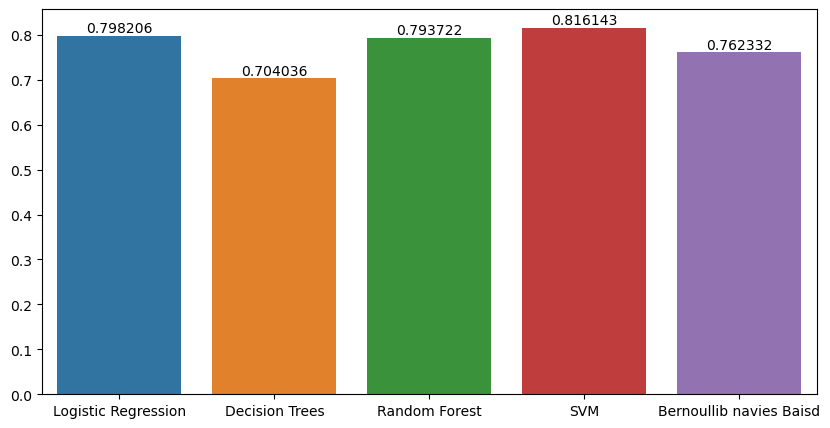

In [90]:
Algorithems = ['Logistic Regression','Decision Trees','Random Forest','SVM','Bernoullib navies Baisd']
Accuracy = [LR,DT,RF,SVM,BN]
plt.figure(figsize=(10,5))
ax = sns.barplot(x = Algorithems,y = Accuracy)
ax.bar_label(ax.containers[0])
plt.show()

* Model Performance Comparison: All five machine learning models (Logistic Regression, Decision Trees, Random Forest
  SVM Bernoulli Naive Bayes) achieved the same accuracy score of 0.762332
    
* No Clear Superior Model: Based on the given accuracy metric, there is no significant difference in performance among the     models